In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize

### ISO639 Meta

In [202]:
meta_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_ISO_639-2_codes')[0]
meta_df.columns = ['639-2', '639-3', '639-5', '639-1', 'lang_name', 'scope', 'type', 'native_name', 'other_name']

In [205]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_ISO_639-2_codes')[0]

,639-2[1],639-3[2],639-5[3],639-1,Language name(s) from ISO 639-2[1],Scope,Type,Native name(s),Other name(s)
0,aar,aar,NaN,aa,Afar,Individual,Living,Qafaraf; ’Afar Af; Afaraf; Qafar af,NaN
1,abk,abk,NaN,ab,Abkhazian,Individual,Living,Аҧсуа бызшәа Aƥsua bızšwa; Аҧсшәа Aƥsua,Abkhaz
2,ace,ace,NaN,NaN,Achinese,Individual,Living,بهسا اچيه,Acehnese
3,ach,ach,NaN,NaN,Acoli,Individual,Living,Lwo,Acholi
4,ada,ada,NaN,NaN,Adangme,Individual,Living,Dangme,Dangme
...,...,...,...,...,...,...,...,...,...
482,znd,NaN,znd,NaN,Zande languages,Collective,NaN,NaN,NaN
483,zul,zul,NaN,zu,Zulu,Individual,Living,isiZulu,NaN
484,zun,zun,NaN,NaN,Zuni,Individual,Living,Shiwi'ma,NaN
485,zxx,zxx,NaN,NaN,No linguistic content; Not applicable,Special,NaN,NaN,NaN


In [196]:
meta_df.loc[pd.isna(meta_df['639-3']), '639-3'] = meta_df.loc[pd.isna(meta_df['639-3']), '639-2']

In [197]:
meta_df[['639-1', '639-3', 'lang_name', 'native_name', 'other_name', 'scope', 'type']]
meta_df.to_csv('iso_mapping.csv', index=False)

### Load Wiki Data

In [5]:
df = pd.read_html('https://meta.wikimedia.org/wiki/List_of_Wikipedias')[0]
df.columns = [
    'no', 'lang', 'lang_local', 'wiki_code', 'articles', 'all_pages', 
    'edits', 'admins', 'users', 'active_users', 'files', 'depth'
]

In [6]:
df[['lang','wiki_code','articles']]

,lang,wiki_code,articles
0,English,en,6655312
1,Cebuano,ceb,6123406
2,German,de,2799700
3,Swedish,sv,2563113
4,French,fr,2521388
...,...,...,...
316,Dinka,din,308
317,Tigrinya,ti,261
318,Kalaallisut,kl,243
319,Dzongkha,dz,237


In [81]:
indices = list(df.loc[df['wiki_code'].isin(['en','af','id','min','jv','su','bug', 'ace', 'bjn', 'nia', 'mad'])].no)
wiki_codes = list(df.loc[df['wiki_code'].isin(['en','af','id','min','jv','su','bug', 'ace', 'bjn', 'nia', 'mad'])].wiki_code)
lang_codes = list(map(lambda x: meta_df.loc[meta_df['639-1'] == x, '639-3'].values[0] if len(x) == 2 else x, wiki_codes))

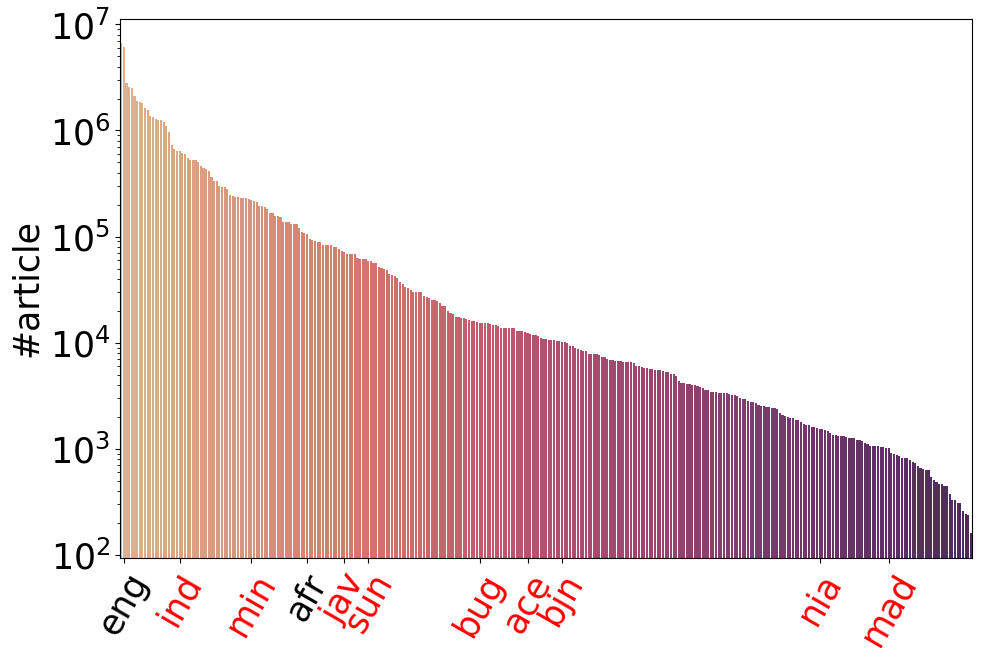

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,7))

ax = sns.barplot(df, x='no', y='articles', log=True, palette='flare')
plt.xticks(indices, lang_codes, rotation=60, fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('')
plt.ylabel('#article',fontsize=25)
for i, t in enumerate(ax.xaxis.get_ticklabels()):
    if lang_codes[i] in ['ind','min','jav','sun','bug', 'ace', 'gor', 'ban', 'bjn', 'nia', 'mad']:
        t.set_color('red')
plt.savefig('wiki_indo_dist.pdf', bbox_inches='tight')
plt.show()

# Other sources

#### CommonCrawl

In [49]:
cc_df = pd.read_html('https://commoncrawl.github.io/cc-crawl-statistics/plots/languages')[0]

In [55]:
meta_df['639-1']

,639-2,639-3,639-5,639-1,lang_name,scope,type,native_name,other_name
0,aar,aar,NaN,aa,Afar,Individual,Living,Qafaraf; ’Afar Af; Afaraf; Qafar af,NaN
1,abk,abk,NaN,ab,Abkhazian,Individual,Living,Аҧсуа бызшәа Aƥsua bızšwa; Аҧсшәа Aƥsua,Abkhaz
2,ace,ace,NaN,NaN,Achinese,Individual,Living,بهسا اچيه,Acehnese
3,ach,ach,NaN,NaN,Acoli,Individual,Living,Lwo,Acholi
4,ada,ada,NaN,NaN,Adangme,Individual,Living,Dangme,Dangme
...,...,...,...,...,...,...,...,...,...
482,znd,NaN,znd,NaN,Zande languages,Collective,NaN,NaN,NaN
483,zul,zul,NaN,zu,Zulu,Individual,Living,isiZulu,NaN
484,zun,zun,NaN,NaN,Zuni,Individual,Living,Shiwi'ma,NaN
485,zxx,zxx,NaN,NaN,No linguistic content; Not applicable,Special,NaN,NaN,NaN


In [59]:
# CC -> Sundanese, Javanese, Indonesian
for code in cc_df.loc[:,('crawl', 'language')].tolist():
    if len(code) == 3:
        print(code, meta_df.loc[meta_df['639-3'] == code, 'lang_name'].values[0] if code in meta_df['639-3'].tolist() else code)
    else:
        print(code)

<unknown>
aar Afar
abk Abkhazian
afr Afrikaans
aka Akan
amh Amharic
ara Arabic
asm Assamese
aym Aymara
aze Azerbaijani
bak Bashkir
bel Belarusian
ben Bengali
bih bih
bis Bislama
bod Tibetan
bos Bosnian
bre Breton
bul Bulgarian
cat Catalan; Valencian
ceb Cebuano
ces Czech
chr Cherokee
cos Corsican
crs crs
cym Welsh
dan Danish
deu German
div Divehi; Dhivehi; Maldivian
dzo Dzongkha
ell Greek, Modern (1453–)
eng English
epo Esperanto
est Estonian
eus Basque
fao Faroese
fas Persian
fij Fijian
fin Finnish
fra French
fry Western Frisian
gla Gaelic; Scottish Gaelic
gle Irish
glg Galician
glv Manx
got Gothic
grn Guarani
guj Gujarati
hat Haitian; Haitian Creole
hau Hausa
haw Hawaiian
heb Hebrew
hin Hindi
hmn Hmong; Mong
hrv Croatian
hun Hungarian
hye Armenian
ibo Igbo
iku Inuktitut
ile Interlingue; Occidental
ina Interlingua (International Auxiliary Language Association)
ind Indonesian
ipk Inupiaq
isl Icelandic
ita Italian
jav Javanese
jpn Japanese
kal Kalaallisut; Greenlandic
kan Kannada
kas Ka

In [61]:
# Other Sources
paracrawl = ['bg', 'ca', 'cs', 'da', 'de', 'el', 'en', 'es', 'et', 'eu', 'fi', 'fr', 'ga', 'gl', 'hr', 'hu', 'is', 'it', 'km', 'ko', 'lt', 'lv', 'mt', 'my', 'nb', 'ne', 'nl', 'nn', 'pl', 'ps', 'pt', 'ro', 'ru', 'si', 'sk', 'sl', 'so', 'sv', 'sw', 'tl', 'uk', 'zh']
bible = ['aau', 'aaz', 'abx', 'aby', 'acf', 'acu', 'adz', 'aey', 'agd', 'agg', 'agm', 'agn', 'agr', 'agu', 'aia', 'ake', 'alp', 'alq', 'als', 'aly', 'ame', 'amk', 'amp', 'amr', 'amu', 'anh', 'anv', 'aoi', 'aoj', 'apb', 'apn', 'apu', 'apy', 'arb', 'arl', 'arn', 'arp', 'aso', 'ata', 'atb', 'atd', 'atg', 'auc', 'aui', 'auy', 'avt', 'awb', 'awk', 'awx', 'azg', 'azz', 'bao', 'bbb', 'bbr', 'bch', 'bco', 'bdd', 'bea', 'bel', 'bgs', 'bgt', 'bhg', 'bhl', 'big', 'bjr', 'bjv', 'bkd', 'bki', 'bkq', 'bkx', 'bla', 'blw', 'blz', 'bmh', 'bmk', 'bmr', 'bnp', 'boa', 'boj', 'bon', 'box', 'bqc', 'bre', 'bsn', 'bsp', 'bss', 'buk', 'bus', 'bvr', 'bxh', 'byx', 'bzd', 'bzj', 'cab', 'caf', 'cao', 'cap', 'car', 'cav', 'cax', 'cbc', 'cbi', 'cbk', 'cbr', 'cbs', 'cbt', 'cbu', 'cbv', 'cco', 'ces', 'cgc', 'cha', 'chd', 'chf', 'chk', 'chq', 'chz', 'cjo', 'cjv', 'cle', 'clu', 'cme', 'cmn', 'cni', 'cnl', 'cnt', 'cof', 'con', 'cop', 'cot', 'cpa', 'cpb', 'cpc', 'cpu', 'crn', 'crx', 'cso', 'cta', 'ctp', 'ctu', 'cub', 'cuc', 'cui', 'cut', 'cux', 'cwe', 'daa', 'dad', 'dah', 'ded', 'deu', 'dgr', 'dgz', 'dif', 'dik', 'dji', 'djk', 'dob', 'dwr', 'dww', 'dwy', 'eko', 'emi', 'emp', 'eng', 'epo', 'eri', 'ese', 'etr', 'faa', 'fai', 'far', 'for', 'fra', 'fuf', 'gai', 'gam', 'gaw', 'gdn', 'gdr', 'geb', 'gfk', 'ghs', 'gia', 'glk', 'gmv', 'gng', 'gnn', 'gnw', 'gof', 'grc', 'gub', 'guh', 'gui', 'gul', 'gum', 'guo', 'gvc', 'gvf', 'gwi', 'gym', 'gyr', 'hat', 'haw', 'hbo', 'hch', 'heb', 'heg', 'hix', 'hla', 'hlt', 'hns', 'hop', 'hrv', 'hub', 'hui', 'hus', 'huu', 'huv', 'hvn', 'ign', 'ikk', 'ikw', 'imo', 'inb', 'ind', 'ino', 'iou', 'ipi', 'ita', 'jac', 'jao', 'jic', 'jiv', 'jpn', 'jvn', 'kaq', 'kbc', 'kbh', 'kbm', 'kdc', 'kde', 'kdl', 'kek', 'ken', 'kew', 'kgk', 'kgp', 'khs', 'kje', 'kjs', 'kkc', 'kky', 'klt', 'klv', 'kms', 'kmu', 'kne', 'knf', 'knj', 'kos', 'kpf', 'kpg', 'kpj', 'kpw', 'kqa', 'kqc', 'kqf', 'kql', 'kqw', 'ksj', 'ksr', 'ktm', 'kto', 'kud', 'kue', 'kup', 'kvn', 'kwd', 'kwf', 'kwi', 'kwj', 'kyf', 'kyg', 'kyq', 'kyz', 'kze', 'lac', 'lat', 'lbb', 'leu', 'lex', 'lgl', 'lid', 'lif', 'lww', 'maa', 'maj', 'maq', 'mau', 'mav', 'maz', 'mbb', 'mbc', 'mbh', 'mbl', 'mbt', 'mca', 'mcb', 'mcd', 'mcf', 'mcp', 'mdy', 'med', 'mee', 'mek', 'meq', 'met', 'meu', 'mgh', 'mgw', 'mhl', 'mib', 'mic', 'mie', 'mig', 'mih', 'mil', 'mio', 'mir', 'mit', 'miz', 'mjc', 'mkn', 'mks', 'mlh', 'mlp', 'mmx', 'mna', 'mop', 'mox', 'mph', 'mpj', 'mpm', 'mpp', 'mps', 'mpx', 'mqb', 'mqj', 'msb', 'msc', 'msk', 'msm', 'msy', 'mti', 'muy', 'mva', 'mvn', 'mwc', 'mxb', 'mxp', 'mxq', 'mxt', 'myu', 'myw', 'myy', 'mzz', 'nab', 'naf', 'nak', 'nay', 'nbq', 'nca', 'nch', 'ncj', 'ncl', 'ncu', 'ndj', 'nfa', 'ngp', 'ngu', 'nhg', 'nhi', 'nho', 'nhr', 'nhu', 'nhw', 'nhy', 'nif', 'nin', 'nko', 'nld', 'nlg', 'nna', 'nnq', 'not', 'nou', 'npl', 'nsn', 'nss', 'ntj', 'ntp', 'nwi', 'nyu', 'obo', 'ong', 'ons', 'ood', 'opm', 'ote', 'otm', 'otn', 'otq', 'ots', 'pab', 'pad', 'pah', 'pao', 'pes', 'pib', 'pio', 'pir', 'pjt', 'plu', 'pma', 'poe', 'poi', 'pon', 'poy', 'ppo', 'prf', 'pri', 'ptp', 'ptu', 'pwg', 'quc', 'quf', 'quh', 'qul', 'qup', 'qvc', 'qve', 'qvh', 'qvm', 'qvn', 'qvs', 'qvw', 'qvz', 'qwh', 'qxh', 'qxn', 'qxo', 'rai', 'rkb', 'rmc', 'roo', 'rop', 'rro', 'ruf', 'rug', 'rus', 'sab', 'san', 'sbe', 'seh', 'sey', 'sgz', 'shj', 'shp', 'sim', 'sja', 'sll', 'smk', 'snc', 'snn', 'sny', 'som', 'soq', 'spa', 'spl', 'spm', 'sps', 'spy', 'sri', 'srm', 'srn', 'srp', 'srq', 'ssd', 'ssg', 'ssx', 'stp', 'sua', 'sue', 'sus', 'suz', 'swe', 'swh', 'swp', 'sxb', 'tac', 'tav', 'tbc', 'tbl', 'tbo', 'tbz', 'tca', 'tee', 'ter', 'tew', 'tfr', 'tgp', 'tif', 'tim', 'tiy', 'tke', 'tku', 'tna', 'tnc', 'tnn', 'tnp', 'toc', 'tod', 'toj', 'ton', 'too', 'top', 'tos', 'tpt', 'trc', 'tsw', 'ttc', 'tue', 'tuo', 'txu', 'ubr', 'udu', 'ukr', 'uli', 'ura', 'urb', 'usa', 'usp', 'uvl', 'vid', 'vie', 'viv', 'vmy', 'waj', 'wal', 'wap', 'wat', 'wbp', 'wed', 'wer', 'wim', 'wmt', 'wmw', 'wnc', 'wnu', 'wos', 'wrk', 'wro', 'wsk', 'wuv', 'xav', 'xed', 'xla', 'xnn', 'xon', 'xsi', 'xtd', 'xtm', 'yaa', 'yad', 'yal', 'yap', 'yaq', 'yby', 'ycn', 'yka', 'yml', 'yre', 'yuj', 'yut', 'yuw', 'yva', 'zaa', 'zab', 'zac', 'zad', 'zai', 'zaj', 'zam', 'zao', 'zar', 'zas', 'zat', 'zav', 'zaw', 'zca', 'zia', 'ziw', 'zos', 'zpc', 'zpl', 'zpo', 'zpq', 'zpu', 'zpv', 'zpz', 'zsr', 'ztq', 'zty', 'zyp']

In [64]:
for i, code in enumerate(paracrawl):
    print(i, code, meta_df.loc[meta_df['639-1'] == code, 'lang_name'].values[0] if code in meta_df['639-1'].tolist() else code)

0 bg Bulgarian
1 ca Catalan; Valencian
2 cs Czech
3 da Danish
4 de German
5 el Greek, Modern (1453–)
6 en English
7 es Spanish; Castilian
8 et Estonian
9 eu Basque
10 fi Finnish
11 fr French
12 ga Irish
13 gl Galician
14 hr Croatian
15 hu Hungarian
16 is Icelandic
17 it Italian
18 km Central Khmer
19 ko Korean
20 lt Lithuanian
21 lv Latvian
22 mt Maltese
23 my Burmese
24 nb Bokmål, Norwegian; Norwegian Bokmål
25 ne Nepali
26 nl Dutch; Flemish
27 nn Norwegian Nynorsk; Nynorsk, Norwegian
28 pl Polish
29 ps Pushto; Pashto
30 pt Portuguese
31 ro Romanian; Moldavian; Moldovan
32 ru Russian
33 si Sinhala; Sinhalese
34 sk Slovak
35 sl Slovenian
36 so Somali
37 sv Swedish
38 sw Swahili
39 tl Tagalog
40 uk Ukrainian
41 zh Chinese


In [69]:
!wget https://iso639-3.sil.org/sites/iso639-3/files/downloads/iso-639-3_Name_Index.tab

--2023-05-14 12:44:14--  https://iso639-3.sil.org/sites/iso639-3/files/downloads/iso-639-3_Name_Index.tab
Resolving iso639-3.sil.org (iso639-3.sil.org)... 104.22.11.254, 172.67.29.248, 104.22.10.254, ...
Connecting to iso639-3.sil.org (iso639-3.sil.org)|104.22.11.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211387 (206K)
Saving to: ‘iso-639-3_Name_Index.tab’

iso-639-3_Name_Inde 100%[===================>] 206.43K   453KB/s    in 0.5s    

2023-05-14 12:44:16 (453 KB/s) - ‘iso-639-3_Name_Index.tab’ saved [211387/211387]



In [74]:
iso_df = pd.read_csv('iso-639-3_Name_Index.tab', sep='\t')
for i, code in enumerate(bible):
    print(i, code, iso_df.loc[iso_df['Id'] == code, 'Print_Name'].values[0] if code in iso_df['Id'].tolist() else code)

0 aau Abau
1 aaz Amarasi
2 abx Inabaknon
3 aby Aneme Wake
4 acf Saint Lucian Creole French
5 acu Achuar-Shiwiar
6 adz Adzera
7 aey Amele
8 agd Agarabi
9 agg Angor
10 agm Angaataha
11 agn Agutaynen
12 agr Aguaruna
13 agu Aguacateco
14 aia Arosi
15 ake Akawaio
16 alp Alune
17 alq Algonquin
18 als Tosk Albanian
19 aly Alyawarr
20 ame Yanesha'
21 amk Ambai
22 amp Alamblak
23 amr Amarakaeri
24 amu Guerrero Amuzgo
25 anh Nend
26 anv Denya
27 aoi Anindilyakwa
28 aoj Mufian
29 apb Sa'a
30 apn Apinayé
31 apu Apurinã
32 apy Apalaí
33 arb Standard Arabic
34 arl Arabela
35 arn Mapuche
36 arp Arapaho
37 aso Dano
38 ata Pele-Ata
39 atb Zaiwa
40 atd Ata Manobo
41 atg Ivbie North-Okpela-Arhe
42 auc Waorani
43 aui Anuki
44 auy Awiyaana
45 avt Au
46 awb Awa (Papua New Guinea)
47 awk Awabakal
48 awx Awara
49 azg San Pedro Amuzgos Amuzgo
50 azz Highland Puebla Nahuatl
51 bao Waimaha
52 bbb Barai
53 bbr Girawa
54 bch Bariai
55 bco Kaluli
56 bdd Bunama
57 bea Beaver
58 bel Belarusian
59 bgs Tagabawa
60 bgt 

In [75]:
ind_langs = ['jav', 'ind', 'sun', 'mad', 'bew', 'zlm', 'min', 'bug', 'bjn', 'ace', 'ban', 'mui', 'sas', 'bbc', 'xmm', 'mak', 'pse', 'btd', 'bts', 'btm', 'jax', 'mqy', 'nij', 'ljp', 'inl', 'nia', 'nan', 'akb', 'max', 'aoz', 'hak', 'btx', 'sda', 'xdy', 'gor', 'bhp', 'pmy', 'mdr', 'kge', 'cmn', 'tet', 'rej', 'mfb', 'knx', 'gay', 'osi', 'smw', 'rob', 'mnb', 'kvr', 'xbr', 'lbw', 'bdl', 'lew', 'vkt', 'abs', 'mkn', 'btz', 'yue', 'dnw', 'slp', 'abl', 'ski', 'kjc', 'mhy', 'liw', 'bhq', 'mvp', 'khc', 'mog', 'end', 'hvn', 'kkv', 'sxn', 'ljl', 'cia', 'sly', 'bkr', 'ekg', 'lbx', 'sdq', 'adr', 'ptt', 'blf', 'mqj', 'bgz', 'kei', 'mqg', 'tes', 'gbi', 'otd', 'pmf', 'aaz', 'bhw', 'kjk', 'wlo', 'mqx', 'kzf', 'nxg', 'sya', 'bvu', 'mwv', 'wew', 'byd', 'tld', 'loe', 'dnt', 'frd', 'nxe', 'tjg', 'law', 'mhs', 'rir', 'scg', 'ptu', 'tft', 'vkk', 'xxk', 'mtd', 'djo', 'sbx', 'ges', 'unz', 'eng', 'vkl', 'knl', 'ulm', 'wmm', 'smr', 'apg', 'blj', 'ksx', 'lcf', 'pel', 'set', 'tmn', 'twu', 'atq', 'tlb', 'wow', 'itd', 'mqn', 'tvo', 'aol', 'lmy', 'mhp', 'jmd', 'pnc', 'lnd', 'bkz', 'bfn', 'tnw', 'kod', 'mky', 'skh', 'bac', 'dni', 'dna', 'dnk', 'dun', 'pea', 'kje', 'llg', 'ayz', 'lrt', 'bwp', 'mnz', 'szn', 'twy', 'txq', 'wlw', 'txm', 'blz', 'bhv', 'tom', 'tlu', 'ppk', 'hrk', 'kli', 'lex', 'hji', 'alp', 'tlt', 'abz', 'akg', 'had', 'htu', 'nlc', 'mxd', 'bdb', 'dup', 'iba', 'ila', 'loa', 'tby', 'yli', 'tnt', 'mej', 'uhn', 'heg', 'mzq', 'xmz', 'riu', 'alo', 'lra', 'xkl', 'mqs', 'rgu', 'szw', 'mnx', 'tsg', 'bna', 'lcl', 'bve', 'beu', 'xem', 'txe', 'ptn', 'nlk', 'spr', 'hik', 'amk', 'bnu', 'lev', 'dok', 'emb', 'kyt', 'kem', 'kvb', 'lur', 'mvd', 'aax', 'ndx', 'szb', 'ple', 'ssq', 'kps', 'wnk', 'jaq', 'yva', 'xte', 'myl', 'bhz', 'dms', 'tdn', 'pnp', 'aws', 'woo', 'asc', 'asl', 'bth', 'txt', 'kgq', 'whk', 'kkx', 'kpq', 'lmj', 'mtj', 'kti', 'slu', 'txn', 'lti', 'swu', 'awu', 'ebc', 'lje', 'saj', 'kvv', 'mqc', 'cns', 'bpz', 'row', 'lmf', 'mrz', 'akc', 'wha', 'iwo', 'kzp', 'mqa', 'psa', 'lcq', 'npy', 'tre', 'tdj', 'lwt', 'woi', 'kuk', 'put', 'rjg', 'sjb', 'wrp', 'weo', 'ues', 'bld', 'amv', 'kvo', 'mtg', 'ihp', 'jka', 'nfa', 'duw', 'kgw', 'kyo', 'tpg', 'nea', 'reb', 'skx', 'wul', 'wad', 'wod', 'yac', 'sau', 'and', 'mxn', 'tlv', 'bty', 'duq', 'vbb', 'baj', 'nbq', 'bqr', 'bep', 'bei', 'sre', 'irh', 'tyn', 'lmr', 'lmq', 'lvu', 'lwe', 'slz', 'kts', 'ror', 'twe', 'wah', 'klz', 'lhh', 'awy', 'tnm', 'xod', 'kvw', 'bpq', 'bay', 'klw', 'bvt', 'khe', 'pku', 'saw', 'tcg', 'kqv', 'pgu', 'bls', 'zrs', 'kzz', 'bzn', 'kuv', 'sbr', 'pdo', 'mli', 'kgr', 'adn', 'ahh', 'bnd', 'hap', 'bfg', 'kig', 'ste', 'eip', 'nsy', 'swt', 'ulu', 'wrx', 'wli', 'wms', 'gzn', 'bpv', 'sws', 'cml', 'bne', 'dmr', 'gei', 'pni', 'spb', 'tuj', 'sdu', 'bzq', 'brp', 'grs', 'kmt', 'kwe', 'nps', 'sko', 'bzl', 'kgx', 'awv', 'kkl', 'zka', 'ttp', 'kjr', 'ltu', 'bgb', 'bpo', 'asy', 'enr', 'gef', 'xkn', 'kwt', 'lau', 'mqo', 'mqf', 'mvv', 'nir', 'pmo', 'puj', 'sge', 'tty', 'kvd', 'lcs', 'ums', 'srl', 'wbw', 'kvh', 'mvr', 'rmm', 'jal', 'nxx', 'ury', 'irx', 'nec', 'yir', 'bvz', 'dbf', 'eno', 'gak', 'tmu', 'xkd', 'bzp', 'vko', 'mqp', 'nxl', 'xky', 'wbb', 'wlh', 'fau', 'ilu', 'rth', 'xay', 'dmy', 'jei', 'ddw', 'xmt', 'oia', 'bnq', 'bkl', 'kdw', 'msf', 'nqm', 'sbg', 'seu', 'tzn', 'wng', 'llm', 'dkk', 'bdw', 'ran', 'rnn', 'szp', 'tev', 'tvm', 'udj', 'xks', 'air', 'wgo', 'jbj', 'nks', 'aqm', 'bcd', 'asi', 'dem', 'goq', 'hov', 'kpu', 'bnf', 'msg', 'nxr', 'rhg', 'etz', 'xse', 'sob', 'wno', 'yet', 'xkq', 'mfp', 'duv', 'hmu', 'ktt', 'ley', 'lcd', 'kpd', 'zbt', 'mss', 'mgk', 'snv', 'dij', 'ret', 'drn', 'mth', 'twg', 'bpg', 'bsu', 'kvz', 'psn', 'bsm', 'kzm', 'mhz', 'nkj', 'pru', 'skv', 'gal', 'bup', 'txs', 'tvw', 'kzi', 'slg', 'tpf', 'vto', 'kyd', 'bfe', 'uka', 'kgb', 'kwh', 'ppm', 'wsa', 'bkn', 'imr', 'ymn', 'wkd', 'ert', 'lpe', 'vme', 'mxz', 'kzb', 'whu', 'xke', 'sbt', 'knd', 'nbn', 'kuc', 'njs', 'nni', 'oni', 'orz', 'aos', 'tcm', 'tad', 'trt', 'wrs', 'ner', 'bpp', 'skz', 'dbe', 'toy', 'lce', 'bvk', 'dei', 'kax', 'xau', 'opk', 'jet', 'pas', 'tmj', 'urn', 'jel', 'kdy', 'pud', 'pee', 'auu', 'auw', 'bgy', 'flh', 'kzd', 'raz', 'wru', 'jau', 'gop', 'bzb', 'bhc', 'kvp', 'sve', 'auq', 'tln', 'tlk', 'bsa', 'bqb', 'byl', 'tbp', 'kbv', 'mrf', 'hud', 'kzv', 'xwr', 'kja', 'swr', 'tip', 'bgv', 'wuy', 'tml', 'lji', 'rmh', 'pdn', 'mqi', 'wet', 'bqq', 'bzu', 'daz', 'emw', 'kiy', 'kiq', 'lcc', 'mvx', 'mso', 'sao', 'tlg', 'snu', 'wtw', 'kgv', 'kbi', 'msl', 'wfg', 'tcq', 'lrn', 'dmu', 'sow', 'bnv', 'erw', 'jbr', 'khp', 'khh', 'mmb', 'puc', 'rac', 'wai', 'yrs', 'yki', 'bed', 'bdx', 'kxq', 'lix', 'apx', 'agf', 'wbe', 'puf', 'bqy', 'mgf', 'afz', 'ttn', 'ulf', 'awh', 'bti', 'diy', 'kcd', 'krz', 'kpi', 'kwr', 'srt', 'tkx', 'tfo', 'tti', 'tdi ', 'mnu', 'itx', 'awr', 'tds', 'ire', 'brs', 'mrx', 'amq', 'kzu', 'llq', 'mok', 'plh', 'sgu', 'aip', 'ibu', 'dbn', 'moq', 'naa', 'mvs', 'kly', 'xkw', 'mqr', 'kkb', 'lio', 'lgi', 'ism', 'asz', 'btj', 'khd', 'wor', 'dsn', 'hti', 'huw', 'huk', 'ihb', 'jvd', 'kzx', 'kzl', 'lox', 'mpy', 'vms', 'nae', 'nil', 'nul', 'onx', 'pns', 'spi', 'srw', 'tni', 'tmg', 'tve', 'xmx', 'pey', 'cdo', 'sdo']

In [77]:
for i, code in enumerate(set(ind_langs).intersection(bible)):
    print(i, code, iso_df.loc[iso_df['Id'] == code, 'Print_Name'].values[0] if code in iso_df['Id'].tolist() else code)

0 blz Balantak
1 nbq Nggem
2 alp Alune
3 ptu Bambam
4 yva Yawa
5 ind Indonesian
6 nfa Dhao
7 heg Helong
8 cmn Mandarin Chinese
9 mkn Kupang Malay
10 mqj Mamasa
11 lex Luang
12 amk Ambai
13 hvn Sabu
14 aaz Amarasi
15 kje Kisar
16 eng English


### Summary
- mC4 -> Indonesian, Sundanese, Javanese
- CC -> Indonesian, Sundanese, Javanese
- OSCAR -> Indonesian, Sundanese, Javanese, Minangkabau
- Bible -> 
    - blz Balantak (33,000)
    - nbq Nggem (4,400)
    - alp Alune (21,300)
    - ptu Bambam (40,000)
    - yva Yawa (10,000)
    - nfa Dhao (5,000)
    - heg Helong (14,000)
    - mkn Kupang Malay (200,000)
    - mqj Mamasa (100,000)
    - lex Luang (18,000)
    - amk Ambai (10,000)
    - hvn Sabu (8,000)
    - aaz Amarasi (70,000)
    - kje Kisar (20,000)

In [113]:
!wget https://www.loc.gov/standards/iso639-2/php/code_list.php

--2023-05-27 14:43:31--  https://www.loc.gov/standards/iso639-2/php/code_list.php
Resolving www.loc.gov (www.loc.gov)... 104.16.54.16, 104.16.55.16, 2606:4700::6810:3610, ...
Connecting to www.loc.gov (www.loc.gov)|104.16.54.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘code_list.php’

code_list.php           [ <=>                ]  78.36K  --.-KB/s    in 0.003s  

2023-05-27 14:43:31 (27.8 MB/s) - ‘code_list.php’ saved [80236]



In [120]:
iso2_df = pd.read_html('code_list.php')[1]

In [121]:
iso2_df

,ISO 639-2 Code,ISO 639-1 Code,English name of Language,French name of Language,German name of Language
0,aar,aa,Afar,afar,Danakil-Sprache
1,abk,ab,Abkhazian,abkhaze,Abchasisch
2,ace,NaN,Achinese,aceh,Aceh-Sprache
3,ach,NaN,Acoli,acoli,Acholi-Sprache
4,ada,NaN,Adangme,adangme,Adangme-Sprache
...,...,...,...,...,...
502,znd,NaN,Zande languages,"zandé, langues",Zande-Sprachen
503,zul,zu,Zulu,zoulou,Zulu-Sprache
504,zun,NaN,Zuni,zuni,Zuñi-Sprache
505,zxx,NaN,No linguistic content; Not applicable,pas de contenu linguistique; non applicable,Kein linguistischer Inhalt


In [182]:
iso_df[iso_df['Id'] == 'tel']

,Id,Print_Name,Inverted_Name,639-1
6605,tel,Telugu,Telugu,te


In [ ]:
iso_df = pd.read_csv('iso-639-3_Name_Index.tab', sep='\t')

In [ ]:
def get_639_1(iso639_3):
    if iso639_3 in iso2_df['ISO 639-2 Code'].tolist():
        return iso2_df.loc[iso2_df['ISO 639-2 Code'] == iso639_3, 'ISO 639-1 Code'].values[0]
    elif iso639_3 in meta_df['639-3'].tolist():
        return meta_df.loc[meta_df['639-3'] == iso639_3, '639-1'].values[0]
    else:
        np.nan
iso_df['639-1'] = iso_df['Id'].apply(get_639_1)

In [ ]:
iso_df.loc[~iso_df['639-1'].isna()]

,Id,Print_Name,Inverted_Name,639-1
15,aar,Afar,Afar,aa
32,abk,Abkhazian,Abkhazian,ab
121,afr,Afrikaans,Afrikaans,af
195,aka,Akan,Akan,ak
250,amh,Amharic,Amharic,am
...,...,...,...,...
8005,yor,Yoruba,Yoruba,yo
8141,zha,Chuang,Chuang,za
8142,zha,Zhuang,Zhuang,za
8147,zho,Chinese,Chinese,zh


In [148]:
meta_df.loc[(meta_df['639-3'] != meta_df['639-2'])]

,Id,Print_Name,Inverted_Name,639-1
0,aaa,Ghotuo,Ghotuo,NaN
1,aab,Alumu-Tesu,Alumu-Tesu,NaN
2,aac,Ari,Ari,NaN
3,aad,Amal,Amal,NaN
4,aae,Arbëreshë Albanian,"Albanian, Arbëreshë",NaN
...,...,...,...,...
8281,zza,Kirdki,Kirdki,NaN
8282,zza,Kirmanjki (macrolanguage),Kirmanjki (macrolanguage),NaN
8283,zza,Zaza,Zaza,NaN
8284,zza,Zazaki,Zazaki,NaN


In [127]:
iso2_df.loc[~iso2_df['ISO 639-2 Code'].isin(iso_df['Id'])]

,ISO 639-2 Code,ISO 639-1 Code,English name of Language,French name of Language,German name of Language
6,afa,NaN,Afro-Asiatic languages,"afro-asiatiques, langues",Hamitosemitische Sprachen (Andere)
12,alb (B)sqi (T),sq,Albanian,albanais,Albanisch
14,alg,NaN,Algonquian languages,"algonquines, langues",Algonkin-Sprachen (Andere)
19,apa,NaN,Apache languages,"apaches, langues",Apachen-Sprachen
23,arm (B)hye (T),hy,Armenian,arménien,Armenisch
...,...,...,...,...,...
485,wel (B)cym (T),cy,Welsh,gallois,Kymrisch
486,wen,NaN,Sorbian languages,"sorabes, langues",Sorbisch (Andere)
495,ypk,NaN,Yupik languages,"yupik, langues",Ypik-Sprachen
501,chi (B)zho (T),zh,Chinese,chinois,Chinesisch


In [130]:
iso_df.tail()

,Id,Print_Name,Inverted_Name
8281,zza,Kirdki,Kirdki
8282,zza,Kirmanjki (macrolanguage),Kirmanjki (macrolanguage)
8283,zza,Zaza,Zaza
8284,zza,Zazaki,Zazaki
8285,zzj,Zuojiang Zhuang,"Zhuang, Zuojiang"


In [ ]:
iso_df['']

In [ ]:
meta_df.loc[pd.isna(meta_df['639-3']), '639-3'] = meta_df.loc[pd.isna(meta_df['639-3']), '639-2']

In [141]:
meta_df.loc[(meta_df['639-3'] != meta_df['639-2'])]

,639-2,639-3,639-5,639-1,lang_name,scope,type,native_name,other_name
6,afa,bad,afa,NaN,Afro-Asiatic languages,Collective,NaN,NaN,NaN
13,alg,cai,alg,NaN,Algonquian languages,Collective,NaN,NaN,NaN
18,apa,cpf,apa,NaN,Apache languages,Collective,NaN,NaN,Southern Athabaskan languages
24,art,fiu,art,NaN,Artificial languages,Collective,NaN,NaN,NaN
28,ath,inc,ath,NaN,Athapascan languages,Collective,NaN,NaN,Athabaskan languages
29,aus,ine,aus,NaN,Australian languages,Collective,NaN,NaN,NaN
35,bad,map,bad,NaN,Banda languages,Collective,NaN,NaN,NaN
36,bai,mkh,bai,NaN,Bamileke languages,Collective,NaN,Bamiléké,NaN
42,bat,nic,bat,NaN,Baltic languages,Collective,NaN,NaN,NaN
47,ber,pra,ber,NaN,Berber languages,Collective,NaN,Tamaziɣt; Tamazight; ⵜⴰⵎⴰⵣⵉⵖⵜ; ⵝⴰⵎⴰⵣⵉⵗⵝ; ⵜⴰⵎⴰⵣⵉⵗⵜ,Amazigh languages


In [200]:
meta_df[['lang_name', '639-2', '639-3', '639-5', '639-1']].to_csv('wiki.csv', index=False)

# Wikipedia

In [226]:
wiki_dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_Wikipedias')
ns_df, basic_df, detail_df = wiki_dfs[1], wiki_dfs[3], wiki_dfs[4]

In [231]:
ns_df

Codes                                 WP edition  \
         WP code  ISO 639 code                   WP edition   
0            als           gsw          Alemannic Wikipedia   
1        bat-smg           sgs         Samogitian Wikipedia   
2             bh       bh, bih           Bhojpuri Wikipedia   
3        cbk-zam          none          Chavacano Wikipedia   
4        fiu-vro           vro               Võro Wikipedia   
5            ksh          none          Ripuarian Wikipedia   
6        map-bms          none         Banyumasan Wikipedia   
7             ms  ms, may, msa              Malay Wikipedia   
8         nds-nl      multiple    Dutch Low Saxon Wikipedia   
9             no       nb, nob          Norwegian Wikipedia   
10           nrm           nrf             Norman Wikipedia   
11       roa-rup           rup          Aromanian Wikipedia   
12      roa-tara          none          Tarantino Wikipedia   
13        simple          none     Simple English Wikipedia   
14            sq       sq, sqi           Albanian Wikipedia   
15  zh-classical           lzh  Classical Chinese Wikipedia   
16    zh-min-nan           NaN       Southern Min Wikipedia   
17        zh-yue           yue          Cantonese Wikipedia   

               Language                                              Notes  
               Language                                              Notes  
0      Alemannic German  als is the ISO code for Tosk Albanian. The Ale...  
1            Samogitian  bat is the ISO code for the Baltic languages w...  
2     Bihari (Bhojpuri)  bh and bih are the ISO codes for the Bihari ma...  
3   Zamboanga Chavacano  cbk is the ISO code for Chavacano while zam is...  
4                  Võro  fiu is the ISO code for the Finno-Ugric langua...  
5             Ripuarian  ksh is the ISO code for the Colognian dialect,...  
6            Banyumasan  map is the ISO code for the Austronesian langu...  
7                 Malay  ms, may and msa are the ISO codes for the Mala...  
8       Dutch Low Saxon  nds is the ISO code for Low German, restricted...  
9    Norwegian (Bokmål)  no and nor are the ISO codes for Norwegian in ...  
10               Norman  nrf is the ISO code for the Guernésiais and Jè...  
11            Aromanian     roa is the ISO code for the Romance languages.  
12            Tarantino  As above, like with Aromanian, while nap is th...  
13       Simple English  en-simple is the IETF BCP 47 language tag for ...  
14             Albanian  sq and sqi are the ISO codes for the Albanian ...  
15    Classical Chinese         zh is the ISO code for Chinese in general.  
16         Southern Min  As above, like with Cantonese and Classical Ch...  
17            Cantonese    As above, like with Cantonese and Southern Min.

In [228]:
basic_df

,Wikipedia name in English,Wikipedia namein native language,Language,Script (ISO15924 code),WPcode,Activeregisteredusers,Launch date,Closure date(if applicable),Logo
0,English Wikipedia,English Wikipedia,English,Latn,en,123321,15 January 2001,NaN,NaN
1,French Wikipedia,Wikipédia en français,French,Latn,fr,18526,23 March 2001,NaN,NaN
2,German Wikipedia,Deutschsprachige Wikipedia,German,Latn,de,17653,16 March 2001,NaN,NaN
3,Spanish Wikipedia,Wikipedia en español,Spanish,Latn,es,15351,20 May 2001,NaN,NaN
4,Japanese Wikipedia,ウィキペディア日本語版(Wikipedia nihongo-ban),Japanese,Jpan,ja,14276,20 May 2001,NaN,NaN
...,...,...,...,...,...,...,...,...,...
333,Test2 Wikipedia,Test2 Wikipedia,English,Latn,test2,0,Unknown date,NaN,NaN
334,Toki Pona Wikipedia (deleted),NaN,Toki Pona,Latn,tok (deleted),0,Unknown date,"Closure: 2008Deletion: March 24, 2009",NaN
335,Wikipedia 10 (closed),Wikipedia 10,English,Latn,ten (closed),0,Unknown date,Unknown date,NaN
336,Moldovan Wikipedia (deleted),NaN,Romanian (Moldovan),Cyrl,mo (deleted),-1,Unknown date,"Closure: November 21, 2006Deletion: November 2...",NaN


In [229]:
detail_df

,Language,Language (local),Wiki,Articles,Total pages,Edits,Admins,Users,Active users,Files,Depth,Percentage
0,English,English,en,6659652,58228872,1152117845,906,45599465,123321,903628,1186.41,10.89%
1,Cebuano,Cebuano,ceb,6123353,11226408,35003658,5,103162,174,0,2.17,10.01%
2,German,Deutsch,de,2803309,7736194,232459469,181,4153396,17653,127636,93.04,4.58%
3,Swedish,svenska,sv,2563758,6171913,52819681,67,866999,2110,0,16.95,4.19%
4,French,français,fr,2524224,12579115,204102514,151,4665044,18526,70944,257.45,4.13%
...,...,...,...,...,...,...,...,...,...,...,...,...
326,Afar (closed),Qafár af,aa,0,509,4685,1,4065,1,0,——,0%
327,Akan,Akan,ak,0,1709,29870,1,13690,14,0,——,0%
328,Herero (closed),Otsiherero,hz,0,176,4483,1,3763,1,0,——,0%
329,Kanuri (closed),kanuri,kr,0,162,4641,1,5466,1,0,——,0%


In [235]:
fns_df = ns_df.loc[:,[('Codes', 'WP code'),('Language', 'Language')]]
fns_df.columns = ['wiki', 'lang']
fns_df

,wiki,lang
0,als,Alemannic German
1,bat-smg,Samogitian
2,bh,Bihari (Bhojpuri)
3,cbk-zam,Zamboanga Chavacano
4,fiu-vro,Võro
5,ksh,Ripuarian
6,map-bms,Banyumasan
7,ms,Malay
8,nds-nl,Dutch Low Saxon
9,no,Norwegian (Bokmål)


In [237]:
fbs_df = basic_df.loc[:,['WPcode', 'Language']]
fbs_df.columns = ['wiki', 'lang']
fbs_df['wiki'] = fbs_df['wiki'].apply(lambda x: x.split('(')[0].strip())

In [238]:
fd_df = detail_df.loc[:,['Wiki', 'Language']]
fd_df.columns = ['wiki', 'lang']
fd_df

,wiki,lang
0,en,English
1,ceb,Cebuano
2,de,German
3,sv,Swedish
4,fr,French
...,...,...
326,aa,Afar (closed)
327,ak,Akan
328,hz,Herero (closed)
329,kr,Kanuri (closed)


In [242]:
pd.concat([fns_df, fbs_df, fd_df]).to_csv('wiki.csv', index=False)

In [243]:
pd.concat([fns_df, fbs_df, fd_df])['wiki']

0          als
1      bat-smg
2           bh
3      cbk-zam
4      fiu-vro
        ...   
326         aa
327         ak
328         hz
329         kr
330         na
Name: wiki, Length: 687, dtype: object

In [244]:
for lang in pd.concat([fns_df, fbs_df, fd_df])['wiki']:
    if len(lang) == 2:
        try:
            lang = meta_df.loc[meta_df['639-1'] == lang, '639-3'].values[0]
        except:
            pass
    print(lang)

als
bat-smg
bh
cbk-zam
fiu-vro
ksh
map-bms
msa
nds-nl
nor
nrm
roa-rup
roa-tara
simple
sqi
zh-classical
zh-min-nan
zh-yue
eng
fra
deu
spa
jpn
rus
por
ita
zho
fas
ara
pol
nld
ukr
heb
tur
ind
ces
swe
vie
fin
hun
kor
simple
cat
hin
nor
tha
ron
srp
ell
ben
dan
est
bul
aze
eus
slk
msa
uzb
hrv
hye
slv
lit
kaz
epo
zh-yue
lav
tam
sqi
urd
glg
mal
kat
bel
mkd
arz
tel
afr
bos
tgl
swa
sh
ceb
mar
ckb
isl
nno
lat
mya
asm
be-tarask
oci
pan
ibo
kan
cym
mon
hau
ast
tat
azb
fry
bak
sin
yor
nep
bre
zh-min-nan
als
kur
kir
som
sco
gle
jav
war
hat
ary
bar
arg
tgk
ltz
pnb
guj
khm
lmo
ido
zh-classical
sun
nds
amh
ori
kaa
mlg
san
szl
wuu
hif
que
chv
che
ang
tyv
yid
pus
scn
vec
vol
pms
min
bh
zul
dag
hyw
sah
bcl
kin
twi
lld
ile
tuk
snd
srd
mzn
rue
ina
lao
mlt
nds-nl
sat
xmf
run
shi
wln
crh
mai
fao
lim
frr
fiu-vro
uig
cos
nap
sna
tsn
ban
bjn
oss
eml
avk
map-bms
sme
gla
hsb
aym
lij
roh
ace
grn
chr
cor
lfn
diq
abk
roa-rup
ful
hak
kab
pam
dsb
pcd
bod
zea
mhr
bat-smg
udm
cre
cdo
trv
ssw
vls
lad
kom
vep
gor
haw
ilo
ip